In [ ]:
#connecting google drive for accessing dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt
#plt.style.use('dark_background')
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

In [ ]:
train_path="/content/gdrive/MyDrive/ColabNotebooks/datasets/train"
test_path="/content/gdrive/My Drive/ColabNotebooks/datasets/test"
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)

In [ ]:
print(class_names)
print(class_names_test)

['healthy', 'lam']
['healthy', 'lam']


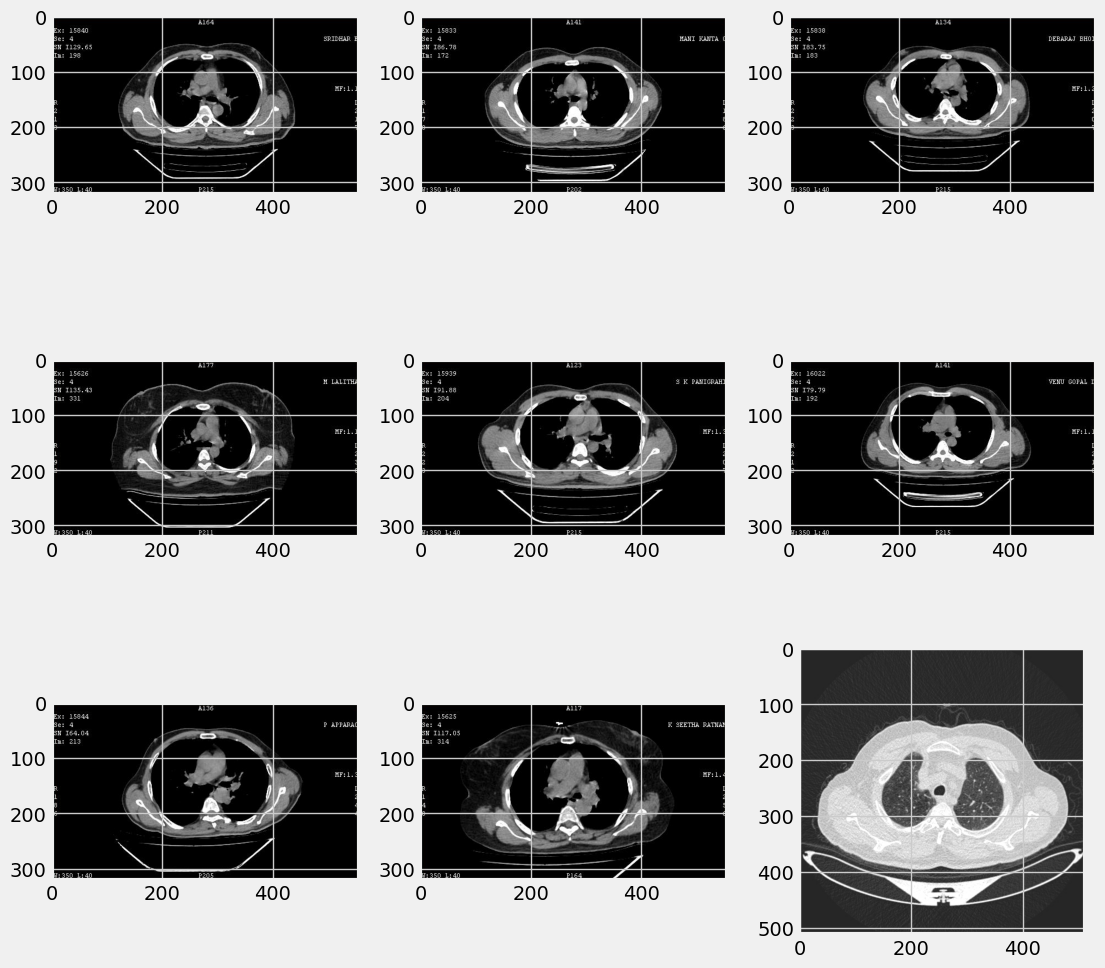

In [ ]:
fig = plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("/content/gdrive/My Drive/ColabNotebooks/datasets/train/healthy/"+
                  os.listdir("/content/gdrive/My Drive/ColabNotebooks/datasets/train/healthy")[i])
    plt.imshow(img)
fig.canvas.manager.set_window_title('Training Healthy images')
plt.show()

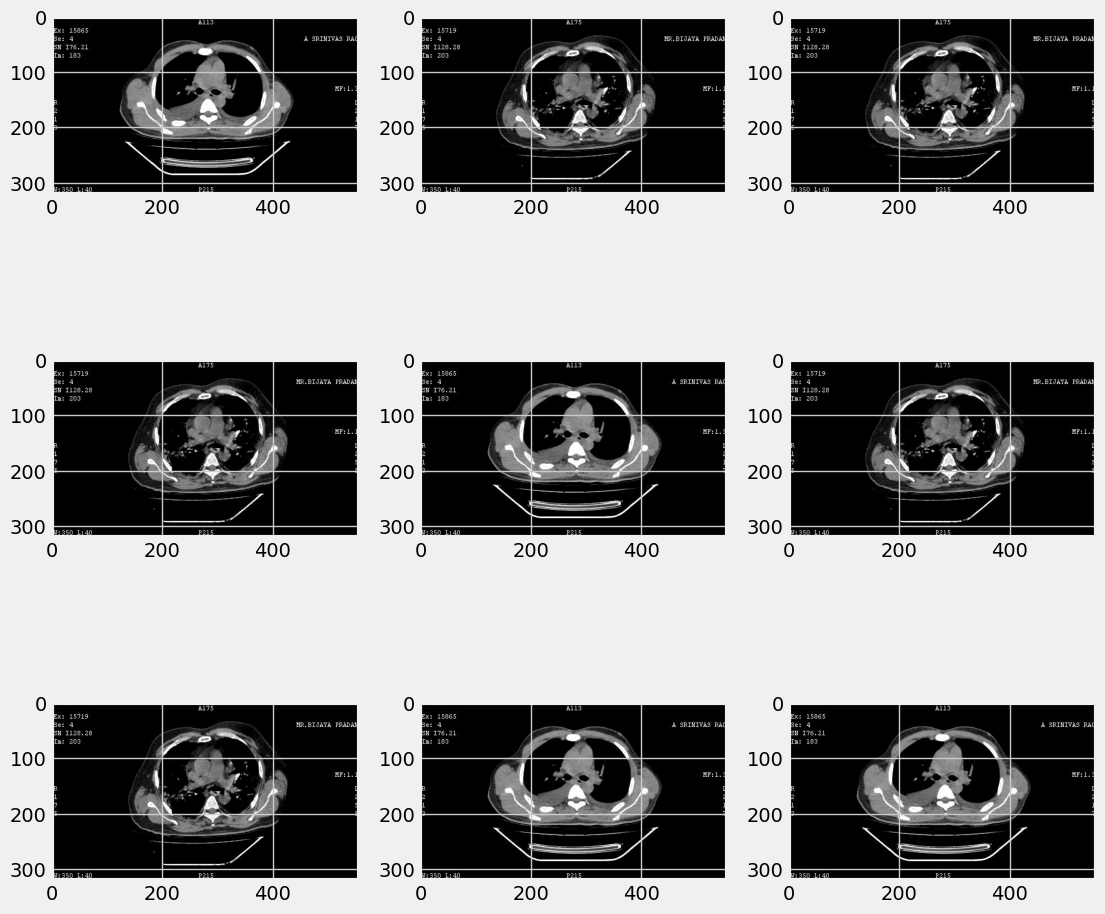

In [ ]:
fig=plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("/content/gdrive/My Drive/ColabNotebooks/datasets/train/lam/"+
                  os.listdir("/content/gdrive/My Drive/ColabNotebooks/datasets/train/lam")[i])
    plt.imshow(img)
fig.canvas.manager.set_window_title('Training Parkinson images')
plt.show()

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense

# Define input shape
input_tensor = Input(shape=(224, 224, 3))

# Build the model
x = Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu")(input_tensor)
x = Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu")(x)
x = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x)

x = Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu")(x)
x = Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu")(x)
x = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x)

x = Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu")(x)
x = Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu")(x)
x = Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu")(x)
x = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x)

x = Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu")(x)
x = Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu")(x)
x = Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu")(x)
x = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x)

x = Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu")(x)
x = Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu")(x)
x = Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu")(x)
vgg16_output = MaxPool2D(pool_size=(2, 2), strides=(2, 2), name="vgg16")(x)

# Add additional layers
x = Flatten(name="flatten")(vgg16_output)
x = Dense(256, activation="relu")(x)
x = Dense(128, activation="relu")(x)
output = Dense(1, activation="sigmoid")(x)



In [ ]:
# Create the full model
model = Model(inputs=input_tensor, outputs=output)

# Extract intermediate model (up to "vgg16" layer)
Vgg16 = Model(inputs=model.input, outputs=model.get_layer("vgg16").output)

# Test with dummy input
import numpy as np
dummy_input = np.random.random((1, 224, 224, 3))  # Batch size 1, 224x224 RGB image
output = Vgg16.predict(dummy_input)

print("Output shape:", output.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
Output shape: (1, 7, 7, 512)


In [ ]:
model.summary()

Model: "functional_68"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (MaxPooling2D)                 │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,170,497 (80.76 MB)

 Trainable params: 21,170,497 (80.76 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#training model
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  featurewise_center=False,
                                  samplewise_center=False,
                                  featurewise_std_normalization=False,
                                  samplewise_std_normalization=False,
                                  zca_whitening=False,
                                  rotation_range=90,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/gdrive/MyDrive/ColabNotebooks/datasets/train',
                                                   target_size = (224,224),
                                                   batch_size = 16,
                                                   class_mode = 'binary')

test_generator = test_datagen.flow_from_directory('/content/gdrive/MyDrive/ColabNotebooks/datasets/test',
                                                   target_size = (224,224),
                                                   batch_size = 16,
                                                   class_mode = 'binary')

Found 157 images belonging to 2 classes.
Found 444 images belonging to 2 classes.


In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
# from keras.optimizers import SGD
from keras.optimizers import Adam
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [ ]:
mc = ModelCheckpoint('/content/gdrive/MyDrive/ColabNotebooks/best_model.keras', monitor='val_accuracy', mode='max', save_best_only=True)

In [ ]:
history = model.fit(
        train_generator,validation_data=test_generator,
        steps_per_epoch=len(train_generator),
        epochs=50,
        validation_steps=len(test_generator),
        verbose=1,
        callbacks=[mc,es])

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 669s 69s/step - accuracy: 0.8991 - loss: 0.7968 - val_accuracy: 0.4189 - val_loss: 0.7081
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 643s 66s/step - accuracy: 0.8935 - loss: 0.5875 - val_accuracy: 0.4189 - val_loss: 1.9940
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 677s 65s/step - accuracy: 0.8990 - loss: 0.3929 - val_accuracy: 0.4189 - val_loss: 1.1349
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 621s 66s/step - accuracy: 0.8659 - loss: 0.3932 - val_accuracy: 0.4189 - val_loss: 1.6343
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 624s 65s/step - accuracy: 0.8893 - loss: 0.3640 - val_accuracy: 0.4189 - val_loss:

In [ ]:
model.load_weights("/content/gdrive/MyDrive/ColabNotebooks/best_model.keras")

In [ ]:
results = model.evaluate(test_generator)
print(results) # Print the evaluation results

28/28 ━━━━━━━━━━━━━━━━━━━━ 282s 10s/step - accuracy: 0.4023 - loss: 0.7105
[0.7080602049827576, 0.4189189076423645]


In [ ]:
#accuracy of the model
List = history.history['accuracy']
print("Accuracy : ",List[len(List)-1])

Accuracy :  0.8980891704559326


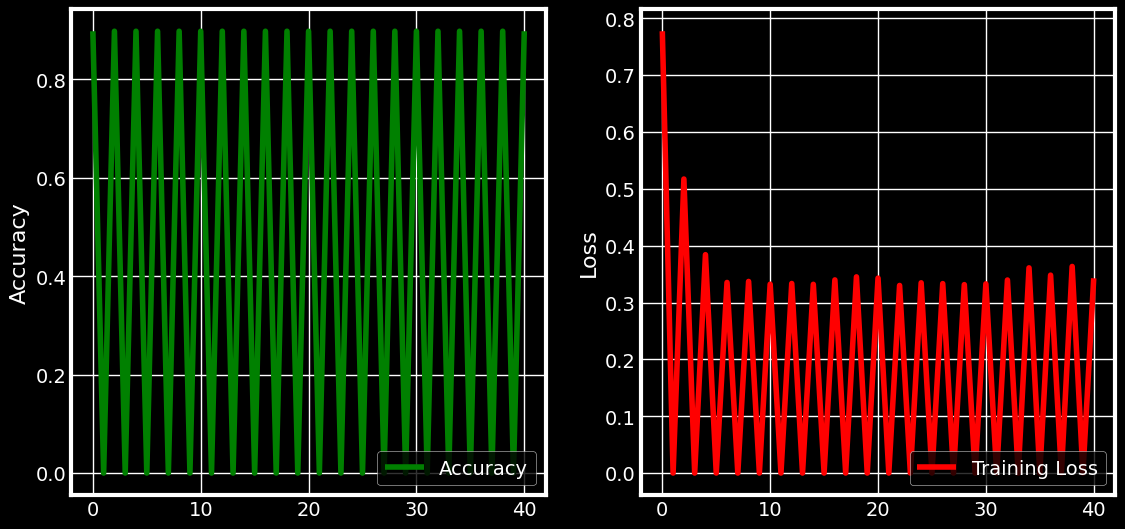

In [ ]:
plt.style.use('dark_background')
fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Accuracy', color = 'green')
plt.legend(loc='lower right')
fig.canvas.manager.set_window_title('Accuracy & Training Loss')



plt.subplot(1,2,2)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss', color = 'red')
plt.legend(loc='lower right')
plt.show()